In [48]:
import seaborn as sns
import polars as pl
import numpy as np
from random import uniform
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
def generate_X(n: int, sample_seed: int, mean: int, scale: int) -> pl.DataFrame:
    rng = np.random.default_rng(seed=sample_seed)
    data = rng.normal(
        loc=mean, scale=scale, size=n)

    return pl.from_numpy(data, schema=['norm'])


X = generate_X(1000,10,0,1)


transformed = X.with_columns([
    (pl.col('norm').sign() * pl.col('norm').abs().pow(2)).alias('pow2_0'),
    (pl.col('norm').sign() * pl.col('norm').abs().pow(1.5)).alias('pow1_5'),
    (pl.col('norm').sign() * pl.col('norm').abs().pow(1.1)).alias('pow0_7'),
     (pl.col('norm').sign() * pl.col('norm').abs().pow(1.1)).alias('pow1_1'),
      (pl.col('norm').sign() * pl.col('norm').abs().pow(0.9)).alias('pow0_9'),
    (pl.col('norm').sign() * pl.col('norm').abs().pow(0.5)).alias('pow0_5'),
    ])

scales = transformed.std()

scale_tasks = [pl.col(n) / scales[n][0] for n in transformed.columns]
scaled = transformed.select(scale_tasks)

pd_scaled = scaled.to_pandas()

scaled.std()

norm,pow2_0,pow1_5,pow0_7,pow1_1,pow0_9,pow0_5
f64,f64,f64,f64,f64,f64,f64
1.0,1.0,1.0,1.0,1.0,1.0,1.0


TypeError: move_legend() missing 1 required positional argument: 'obj'

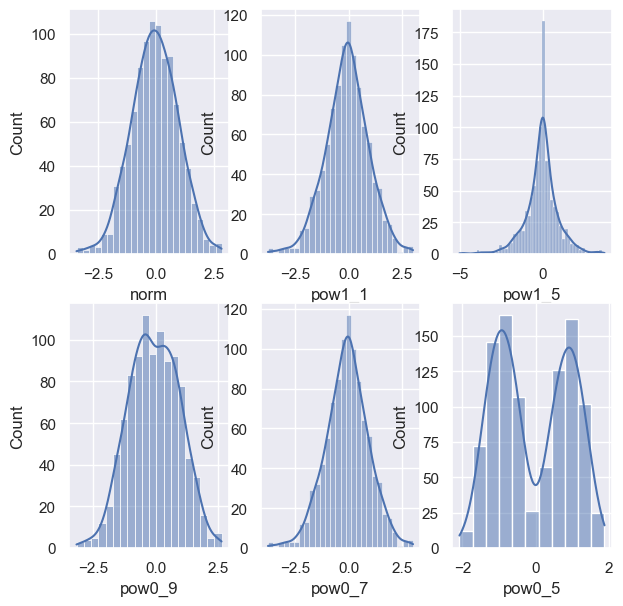

In [63]:
# see that the mean is 0 and std is 1

# libraries & dataset

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set_theme()

fig, axs = plt.subplots(2, 3, figsize=(7, 7))

sns.histplot(data=pd_scaled, x="norm", kde=True,  ax=axs[0, 0])
sns.histplot(data=pd_scaled, x="pow1_1", kde=True, ax=axs[0, 1])
sns.histplot(data=pd_scaled, x="pow1_5", kde=True, ax=axs[0, 2])
sns.histplot(data=pd_scaled, x="pow0_9", kde=True, ax=axs[1, 0])
sns.histplot(data=pd_scaled, x="pow0_7", kde=True, ax=axs[1, 1])
sns.histplot(data=pd_scaled, x="pow0_5", kde=True, ax=axs[1, 2])
sns.move_legend(loc = 'top')

plt.show()

In [42]:


X, y = dom2.generate_data(n=10, sample_seed=354)
X = X.to_pandas()
y = y.to_pandas()




NameError: name 'dom2' is not defined

In [ ]:
plot_data = X
plot_data['class'] = y['class']
g = sns.PairGrid(plot_data, hue='class')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
#g.add_legend()